# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

In [2]:
# OOM (Out of Memory) error occurs when GPU runs out of memory while training deep learning models
# This happens when model/data is too large for available GPU VRAM
# Common causes: large batch sizes, complex model architecture, or memory leaks
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

C:\Users\hp\AppData\Local\Temp\ipykernel_20660\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# directory structure --> data_dir/image_class/image.jpg
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\dosa\masala-dosa.webp
Image not in ext list data\dosa\mix-dal-dosa-lentil-dosa.webp
Image not in ext list data\dosa\oats-dosa-scaled.webp
Image not in ext list data\dosa\Sweet-Potato-Masala-Dosa-1.jpg
Image not in ext list data\Idly\idli-podi-recipe.webp
Image not in ext list data\Idly\Idli-Recipe-1.jpg
Image not in ext list data\Idly\Idli-Recipe-1024x700.webp
Image not in ext list data\Idly\sri-balaji-tiffins-south-indian-special-only-idly-and-dosa-by-order-3270058.webp


# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')
'''
This function returns a tf.data.Dataset object that yields batches of:

Images as float32 tensors with shape (batch_size, height, width, channels)
Labels as int32 tensors with shape (batch_size,)
The dataset is batched, shuffled, and repeated. The batch size is 32 by default.
'''

Found 359 files belonging to 2 classes.


In [10]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator() # Convert TensorFlow dataset into a numpy iterator for easier data access and iteration

In [12]:
batch = data_iterator.next()

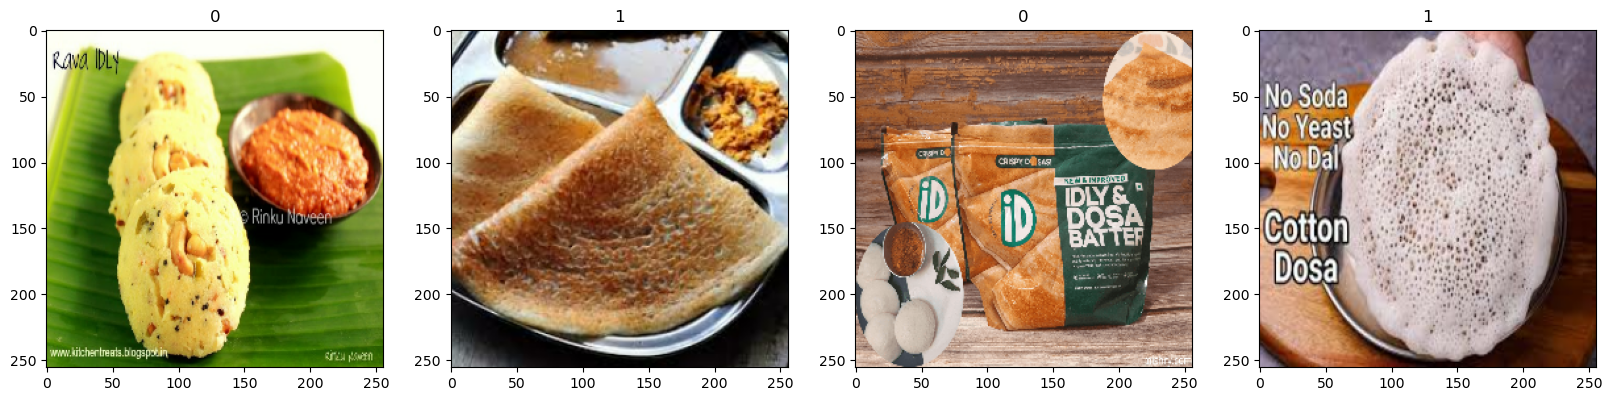

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.6898296 , 0.73296684, 0.18002565],
          [0.6795309 , 0.71482503, 0.14619757],
          [0.6807981 , 0.70040596, 0.12785693],
          ...,
          [0.6905541 , 0.69271797, 0.66401654],
          [0.6862592 , 0.6892616 , 0.64370406],
          [0.709653  , 0.7135746 , 0.68293506]],
 
         [[0.7019608 , 0.74509805, 0.20095742],
          [0.68538094, 0.72067505, 0.15989074],
          [0.68553746, 0.70774186, 0.14217044],
          ...,
          [0.5993806 , 0.651606  , 0.6324424 ],
          [0.7297998 , 0.7533292 , 0.7454861 ],
          [0.7100371 , 0.73289335, 0.722709  ]],
 
         [[0.69411767, 0.7411765 , 0.20784314],
          [0.68719536, 0.7293216 , 0.18814512],
          [0.6899421 , 0.7136511 , 0.1567916 ],
          ...,
          [0.6454766 , 0.68129593, 0.66911983],
          [0.67121977, 0.7071879 , 0.68791705],
          [0.6791652 , 0.71725273, 0.6959751 ]],
 
         ...,
 
         [[0.8387964 , 0.84271795, 0.81918854],
          [0.89902

# 5. Split Data

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
print(train_size, val_size, test_size)

8 2 1


In [18]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [55]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

'''
Loss:

Used to train/optimize the model
Guides the gradient descent process
Helps the model learn and update weights
BinaryCrossentropy is specifically designed for binary classification tasks

Metrics:

Used to evaluate/monitor model performance
Does not affect model training
Provides human-interpretable results
'Accuracy' shows the percentage of correct predictions
'''

'''
Metrics can't be used for gradient descent because most metrics are not differentiable functions. Let me explain:

Loss functions have specific mathematical properties that make them suitable for gradient descent:

They are differentiable (smooth)
They provide continuous feedback
They generate useful gradients for weight updates

# Accuracy is binary (0 or 1)
if prediction > 0.5:
    accuracy = 1
else:
    accuracy = 0

# Binary Cross-Entropy provides smooth gradients
loss = -y * log(prediction) - (1-y) * log(1-prediction)
'''



In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 127, 127, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - accuracy: 0.4771 - loss: 0.8619 - val_accuracy: 0.5469 - val_loss: 0.6600
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.5748 - loss: 0.6447 - val_accuracy: 0.8906 - val_loss: 0.5507
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.7983 - loss: 0.5040 - val_accuracy: 0.8438 - val_loss: 0.3584
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.8802 - loss: 0.3376 - val_accuracy: 0.9062 - val_loss: 0.3034
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 688ms/step - accuracy: 0.8943 - loss: 0.2634 - val_accuracy: 0.8594 - val_loss: 0.2397
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 473ms/step - accuracy: 0.9510 - loss: 0.1396 - val_accuracy: 0.8594 - val_loss: 0.2290
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.9228 - loss: 0.2020 - val_accuracy: 0.9375 - val_loss: 0.1526
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 0.9323 - loss: 0.1774 - val_accuracy: 1.0000 - val_loss:

# 8. Plot Performance

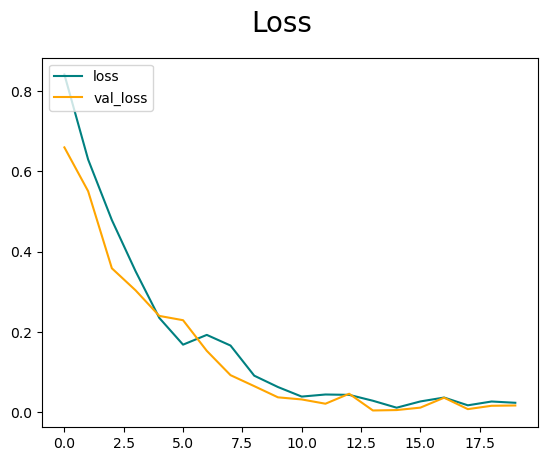

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

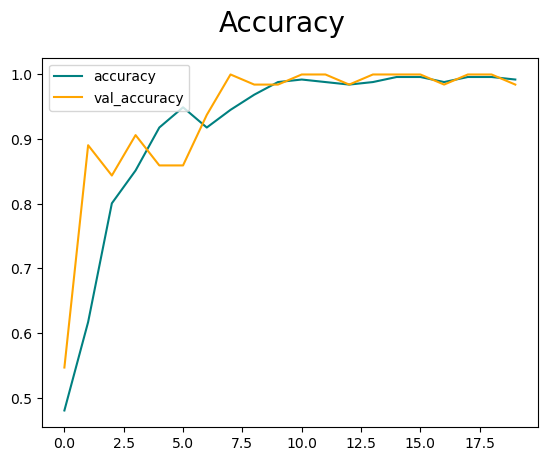

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


In [34]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [35]:
import cv2

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\3950204016.py:1: SyntaxWarning: invalid escape sequence '\P'
  img = cv2.imread('D:\Project\Deep Learning\Indian_Food_Classification\data\dosa\Dosa.jpg')


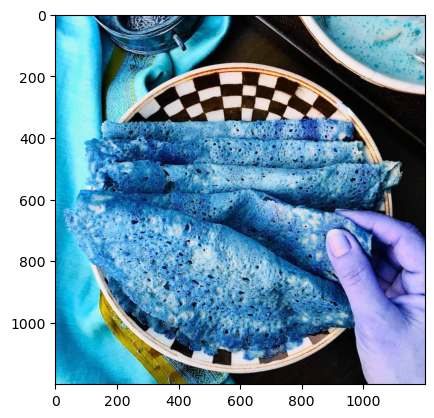

In [38]:
img = cv2.imread('D:\Project\Deep Learning\Indian_Food_Classification\data\dosa\Dosa.jpg')
plt.imshow(img)
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_20660\334342891.py:2: SyntaxWarning: invalid escape sequence '\P'
  img = cv2.imread('D:\Project\Deep Learning\Indian_Food_Classification\data\dosa\Dosa.jpg')


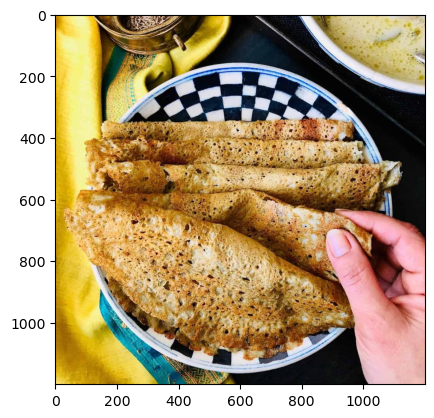

In [39]:
# Method 1: Convert BGR to RGB
img = cv2.imread('D:\Project\Deep Learning\Indian_Food_Classification\data\dosa\Dosa.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()


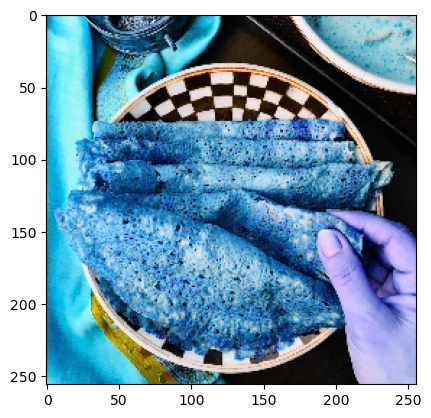

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [42]:
yhat

array([[0.06430084]], dtype=float32)

In [57]:
if yhat > 0.5: 
    print(f'Predicted class is Idly')
else:
    print(f'Predicted class is Dosa')

Predicted class is Dosa


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [47]:
new_model = load_model('models/imageclassifier.h5')

In [48]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[0.06430084]], dtype=float32)